In [1]:
import numpy as np
import cv2
import os
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
db = 'C:/Users/User/Downloads/Database' #database image directory
query = 'C:/Users/User/Downloads/Query' #query image directory

In [3]:
highest_list = []
bestimg_list = []

for img_q in os.listdir(query):
    
    highest = 0
    img_query = cv2.imread(os.path.join(query, img_q )) # queryImage
    img_query = cv2.cvtColor(img_query, cv2.COLOR_BGR2GRAY) # convert color from BGR to gray
    
    for img in os.listdir(db):
        img_db = cv2.imread(os.path.join(db , img)) # databaseImage
        img_db = cv2.cvtColor(img_db, cv2.COLOR_BGR2GRAY) # convert color from BGR to gray


        # Initiate AKAZE detector
        akaze = cv2.AKAZE_create()
        (kp1, des1) = akaze.detectAndCompute(img_query, None)
        (kp2, des2) = akaze.detectAndCompute(img_db, None)
        # BFMatcher with default params
        bf = cv2.BFMatcher()
        matches = bf.knnMatch(des1,des2, k=2)

        # Apply ratio test
        good = []
        for m,n in matches:
            if m.distance < 0.75*n.distance:
                good.append([m])
        if len(good) > highest:
            highest = len(good)
            bestimg = img
    
    highest_list.append(str(highest)) #append highest match value of each query image to the list
    bestimg_list.append(bestimg)    #append the best matching images to the list

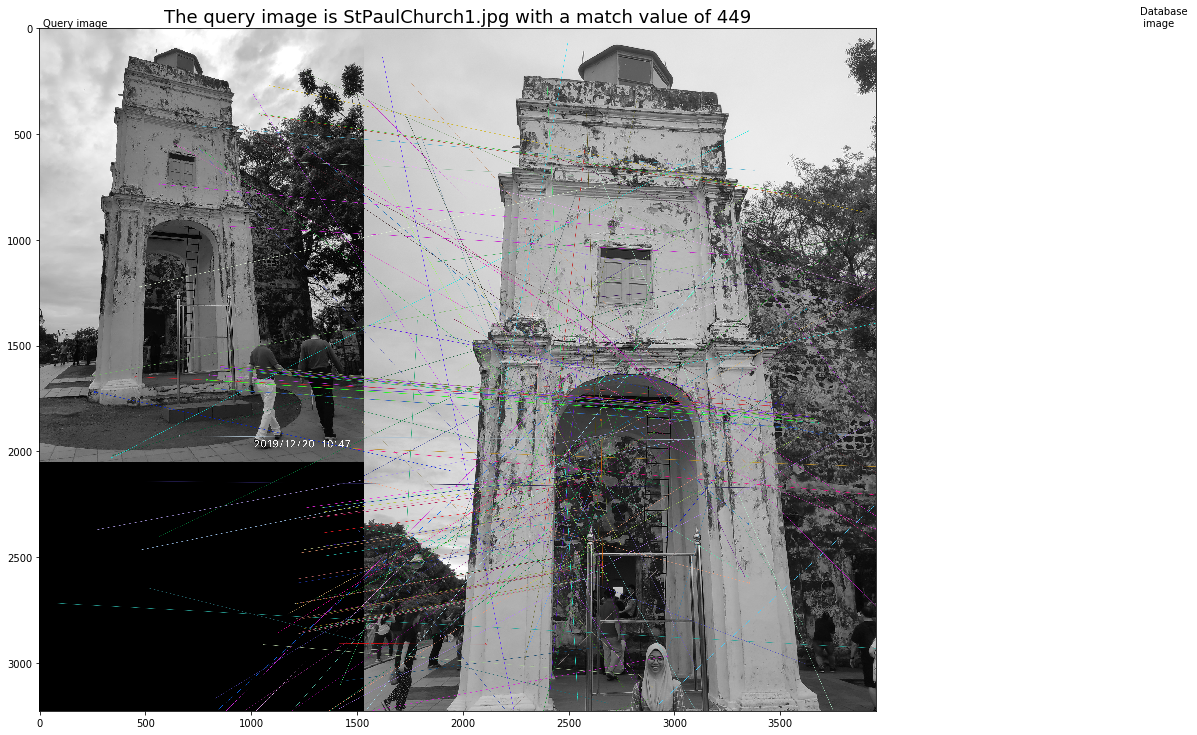

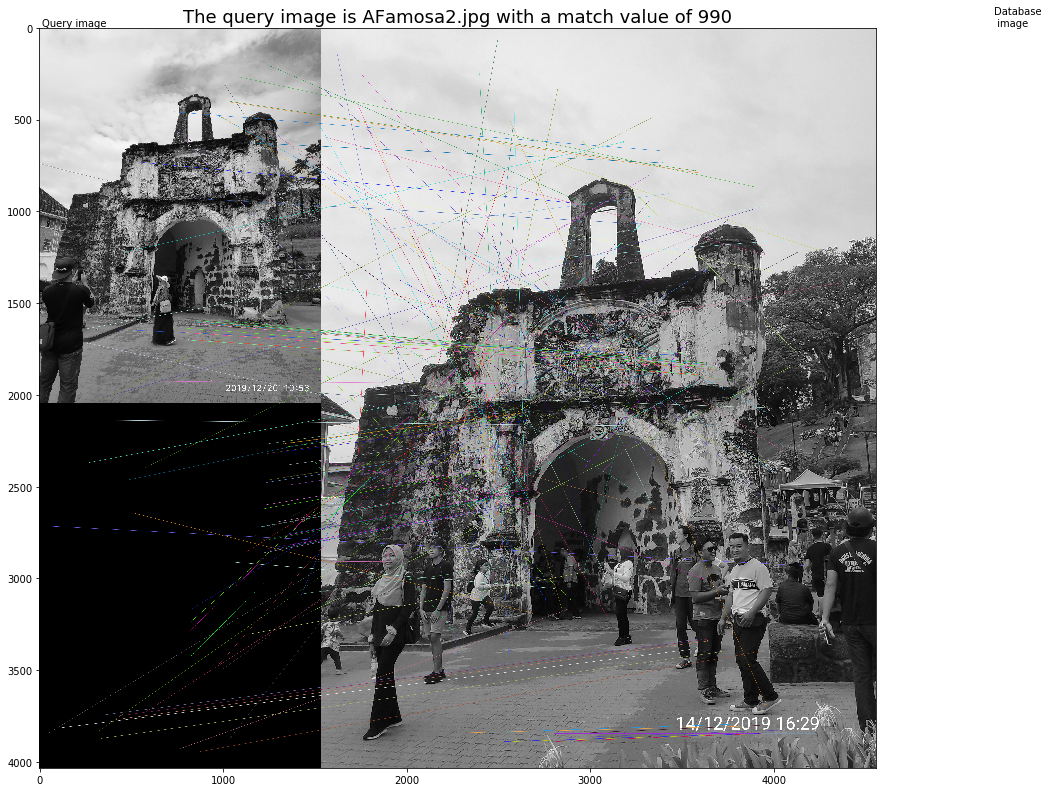

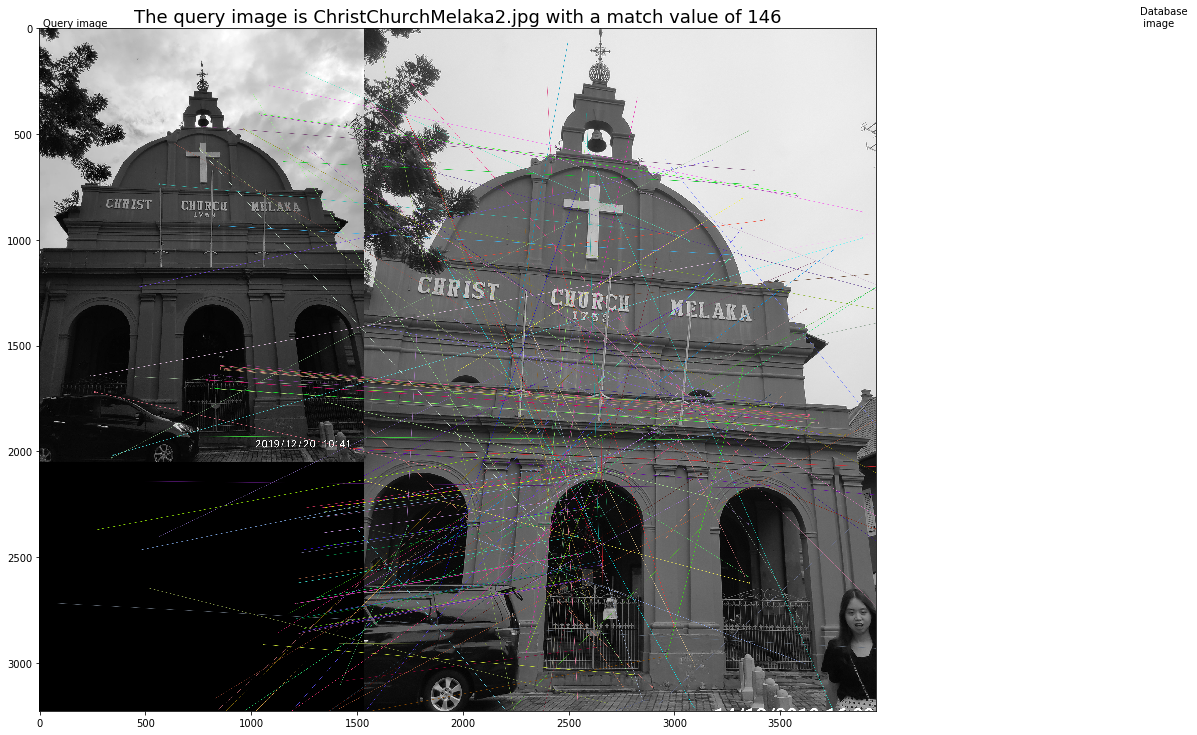

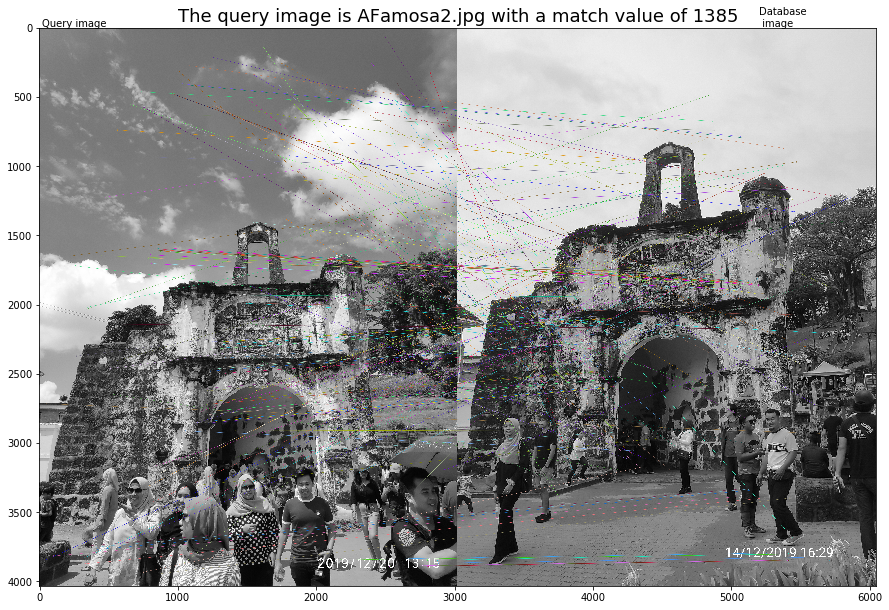

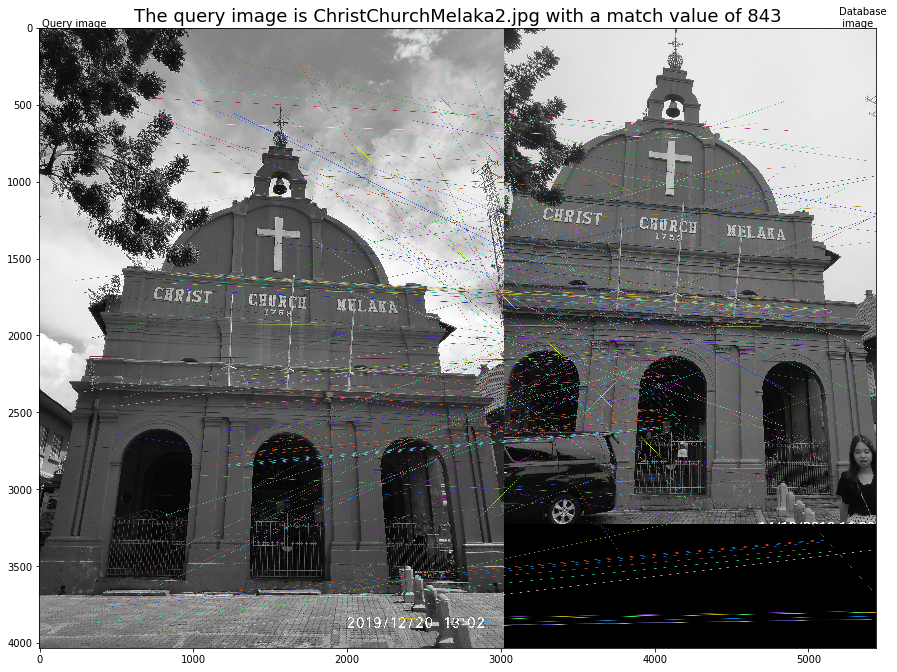

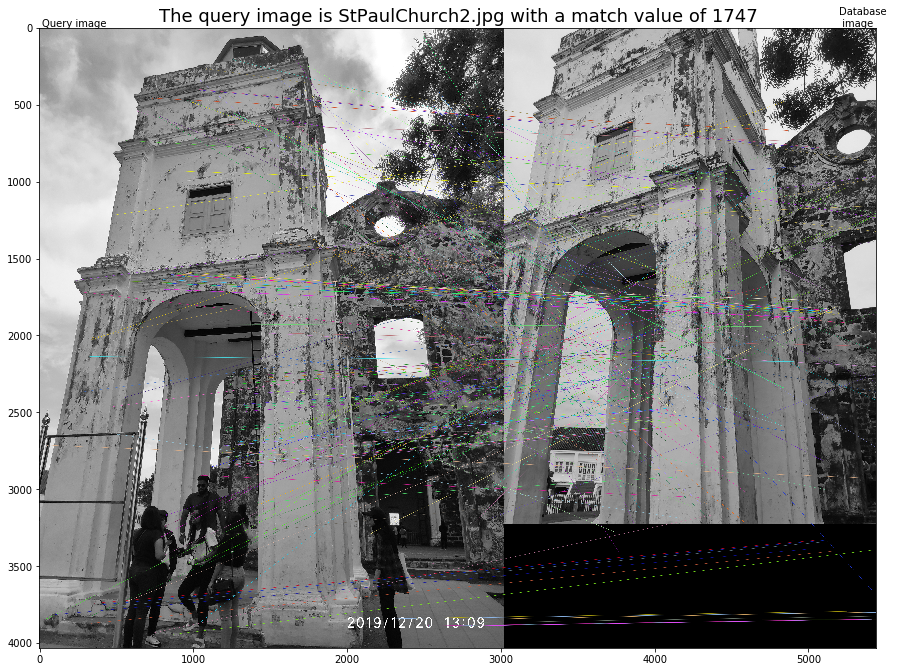

In [5]:
for i in range(6):
    img_query = cv2.imread(os.path.join(query, os.listdir(query)[i]))
    img_query = cv2.cvtColor(img_query, cv2.COLOR_BGR2GRAY)
    
    img_db = cv2.imread(os.path.join(db , bestimg_list[i])) 
    img_db = cv2.cvtColor(img_db, cv2.COLOR_BGR2GRAY) 
    
    img_akaze = cv2.drawMatchesKnn(img_query,kp1,img_db,kp2,good, None, flags=2)
    fig = plt.figure(figsize = (15,15))
    ax = fig.add_subplot(111)
    ax.set_title('The query image is {0} with a match value of {1}'.format(bestimg_list[i], highest_list[i]) , fontsize=18 )
    plt.text(15, -10, "Query image")
    plt.text(5200, -10, "Database \n image")
    ax.imshow(img_akaze), plt.axis('on')